<a href="https://colab.research.google.com/github/Oscar52analitica/Data_science_Coder_Oscar_Camargo/blob/main/ProyectoDS_Camargo_Oscar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre entrega n°1 - Oscar Orlando Camrgo Vargas

1.   Elemento de la lista
2.   Elemento de la lista


## Análisis de impacto del precio de fabricaicón de diferentes modelos de autos según su año de fabricación: Estudio de Datos

## ABSTRACT

### Resumen:
#### Este proyecto se centra en el análisis  de los datos el csv Cars_Database, examinando diversas características como:
- Precio.
- Año de Fabricación.
- Tamaño de Motor.
- Consumo por millas.
- Millaje.
- Gasto de combustible.

 ###  Hipótesis de interés:
#### Basándonos en un análisis previo del dataset, planteamos las siguientes

### hipótesis:
- Relación entre año y precio: ¿Cómo afecta el año de fabricación al precio de los automóviles? Hipótesis: Los autos más nuevos tienden a ser más caros.
- Impacto de la transmisión en el precio: ¿Es la transmisión automática más cara que la manual?
- Influencia del tipo de combustible: ¿Los autos que utilizan combustible más eficiente tienen un precio más alto?
- Costo por milla vs. Años de circulación: ¿Los autos que han circulado más años tienen un costo por milla más bajo?
- Se iniciara conociendo valores estadisticos que permiten conocer medidas para generar graficos y analisis que generen la respuesta de la hipotesis y las preguntas de interes planteadas
  ### Objetivos:

- Validar las hipótesis formuladas a través de análisis estadísticos y representaciones gráficas.
- Descubrir patrones y tendencias dentro del conjunto de datos.
- Crear un modelo predictivo para calcular la relación entre el año de fabriación de un auto y su precio.

### Impacto:
#### Los resultados de este estudio permitirán:

- Determinar los factores que influyen en el precio de un vehiculo.
- Crear informes para la toma de desiciones a la hora de la compra de un vehiculo si es mas combeniente uno sobre otro analisando diferentes variables.
- Construir un modelo que permita comparar diferentes variables a una persona a fin de simplificar conceptos y predecir cual vehiculo es mas combeniente para difernetes presupuestos.

## Contenido de el Csv

- El file continene 15 Columnas distribuidas de la siguiente manera:
-Primiry_key: lLave que permite identificar cada resgitro unico segun marca del auto.
-Model: Modelo del auto segun su fabricante.
-Year: Año de Fabricacion.
-Price: Precio de venta del auto.
- transmission: Tipo de transmision del vehiculo(Automatica, manual, semi automatica)
- Millage: Cantidad de millas que tienen el motor del vehiculo a la fecha.
- FuelType: Tipo de Combustile(Gasolina, Diesel, Electrico, Hibrido,Gas)
-Tax: Impuesto que paga el vehiculo.
-Mpg: Consumo de galon de combustible por milla de desplazamineto.
-engineSize: Tamaño del motor del vehiculo.
- Make: Fabricante del vehiculo( Audi, BMW, ETC.)
- Años de circulacion: Años de circulacion del vehiculo a la fecha.
- Costo por milla: Precio de combistible segun el millage del vehiculo.
-Consumo de combustible por año(Millas por galon): Consumo anual de combustible del vehiculo segun los datos registrados en la BD.
Tax_Bracket: Rango de impuestos segun categorias(Alto, Medio, Bajo)


Importación de librerias

In [11]:
# Manipulación de datos y operaciones numéricas

import pandas as pd  # Manejo de datos en formato tabular (DataFrames)
import numpy as np  # Operaciones numéricas y manejo de arrays

# Visualización de datos
import matplotlib.pyplot as plt  # Creación de gráficos y visualizaciones básicas
import seaborn as sns  # Visualización avanzada, basada en matplotlib con temas y gráficos predeterminados

# Preprocesamiento de datos
from sklearn.impute import SimpleImputer  # Imputación de valores faltantes en el conjunto de datos
from sklearn.preprocessing import LabelEncoder  # Codificación de variables categóricas en valores numéricos

# Modelado y selección de modelos
from sklearn.model_selection import train_test_split  # División del conjunto de datos en entrenamiento y prueba

# Algoritmos de regresión
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV  # Regresiones lineales y regularizadas
from sklearn.neighbors import KNeighborsRegressor as KNN  # Algoritmo de regresión basado en vecinos más cercanos
from xgboost import XGBRegressor  # Algoritmo de regresión basado en boosting

# Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score  # Métricas de evaluación para modelos de regresión (error cuadrático medio y coeficiente de determinación)

# Sistema operativo
import os  # Interacción con el sistema operativo, manejo de rutas, archivos, etc.


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:

# Cambiar al directorio 'Proyecto_Data_sciense'
os.chdir('/content/drive/My Drive/Proyecto_Data_sciense')

# Leer el archivo de Excel 'Cars_Database.xlsx'
df_cars= pd.read_excel('Cars_Database.xlsx')

# EDA

### Análisis Exploratorio de Datos

Vamos a empezar con la descripcion del dataframe para conocer su estructura

In [14]:
print(df_cars.info())
print(df_cars.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 15 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Primiry_key                                       72435 non-null  object 
 1   model                                             72435 non-null  object 
 2   year                                              72435 non-null  int64  
 3   price                                             72435 non-null  int64  
 4   transmission                                      72435 non-null  object 
 5   mileage                                           72435 non-null  int64  
 6   fuelType                                          72435 non-null  object 
 7   tax                                               72435 non-null  int64  
 8   mpg                                               72435 non-null  int64  
 9   engineSize       

Para  que el analisis sea completo se deben buscar en las culumnas valores en en cero o en NaN para ello se aplica el codigo visto en clase

In [15]:
# Ubicar filas con al menos un valor 0 o NaN
columnas_cero = (df_cars== 0).any()
columnas_nan =  df_cars.isna().any()


print("Filas con valor 0 o NaN:")
print(columnas_cero)
print(columnas_nan)


Filas con valor 0 o NaN:
Primiry_key                                         False
model                                               False
year                                                False
price                                               False
transmission                                        False
mileage                                             False
fuelType                                            False
tax                                                  True
mpg                                                  True
engineSize                                           True
Make                                                False
Años de circulacion                                 False
Costo por milla                                     False
Consumo de combustible por año(Millas por galon)     True
Tax_Bracket                                         False
dtype: bool
Primiry_key                                         False
model                              

In [16]:
# Reemplazar valores 0 en columnas numéricas con la mediana de la columna
for col in df_cars.columns:
    if df_cars[col].dtype in ['int64', 'float64'] and columnas_cero[col]:
        df_cars[col] = df_cars[col].replace(0, df_cars[col].median())


Remplazar los nulos o Nan con la media

In [17]:

df_cars['tax'] = df_cars['tax'].replace(0, df_cars['tax'].median())
print(df_cars['tax'])

df_cars['mpg'] = df_cars['mpg'].replace(0, df_cars['mpg'].median())
print(df_cars['mpg'])

df_cars['engineSize'] = df_cars['engineSize'].replace(0, df_cars['engineSize'].median())
print(df_cars['engineSize'])

df_cars['Consumo de combustible por año(Millas por galon)'].fillna(df_cars['Consumo de combustible por año(Millas por galon)'].median(), inplace=True)

0        150
1         20
2         30
3        145
4        145
        ... 
72430    145
72431     30
72432     20
72433    145
72434    125
Name: tax, Length: 72435, dtype: int64
0        55
1        64
2        55
3        67
4        50
         ..
72430    78
72431    66
72432    60
72433    45
72434    58
Name: mpg, Length: 72435, dtype: int64
0        1.4
1        2.0
2        1.4
3        2.0
4        1.0
        ... 
72430    1.6
72431    1.7
72432    1.0
72433    1.6
72434    1.7
Name: engineSize, Length: 72435, dtype: float64


In [18]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 15 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Primiry_key                                       72435 non-null  object 
 1   model                                             72435 non-null  object 
 2   year                                              72435 non-null  int64  
 3   price                                             72435 non-null  int64  
 4   transmission                                      72435 non-null  object 
 5   mileage                                           72435 non-null  int64  
 6   fuelType                                          72435 non-null  object 
 7   tax                                               72435 non-null  int64  
 8   mpg                                               72435 non-null  int64  
 9   engineSize       

## Datos Numericos

In [19]:
df_cars.describe()

,year,price,mileage,tax,mpg,engineSize,Años de circulacion,Costo por milla,Consumo de combustible por año(Millas por galon)
count,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000
mean,2017.073666,16580.158708,23176.517057,128.487748,55.852212,1.640686,6.926334,57.920335,422.432181
std,2.101252,9299.028754,21331.515562,54.252113,17.107631,0.553966,2.101252,575.088101,403.598729
min,1996.000000,495.000000,1.000000,10.000000,1.000000,0.600000,4.000000,0.002786,1.000000
25%,2016.000000,10175.000000,7202.500000,140.000000,48.000000,1.200000,5.000000,0.364403,152.000000
50%,2017.000000,14495.000000,17531.000000,145.000000,55.000000,1.600000,7.000000,0.797500,309.000000
75%,2019.000000,20361.000000,32449.000000,145.000000,63.000000,2.000000,8.000000,2.686766,562.000000
max,2020.000000,145000.000000,323000.000000,580.000000,471.000000,6.600000,28.000000,69000.000000,7341.000000


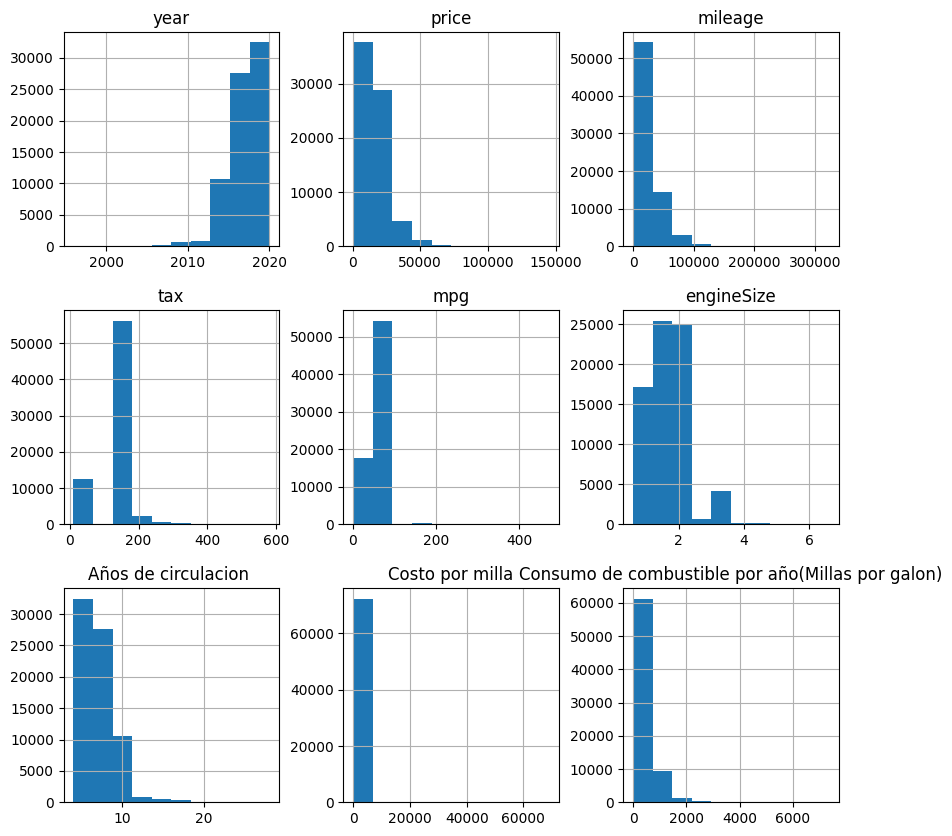

In [20]:
df_cars.hist(figsize=(10, 10))
plt.show()

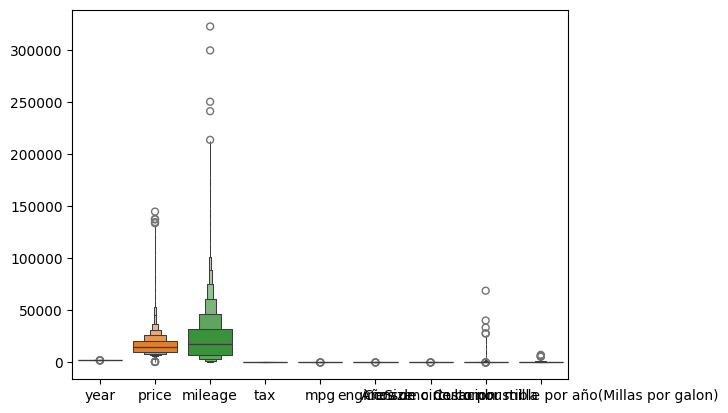

In [21]:
sns.boxenplot(df_cars)
plt.show()

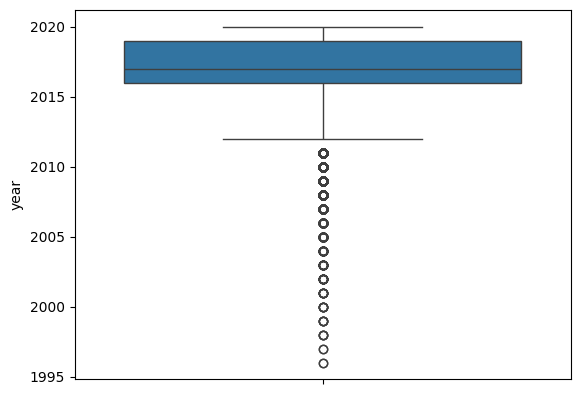

In [22]:
sns.boxplot(data=df_cars['year'])
plt.show()

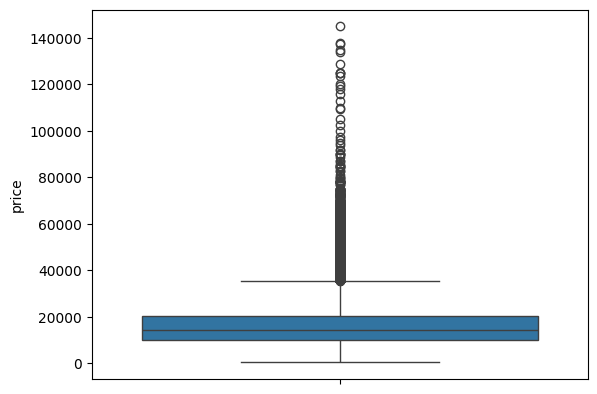

In [23]:
sns.boxplot(data=df_cars['price'])
plt.show()

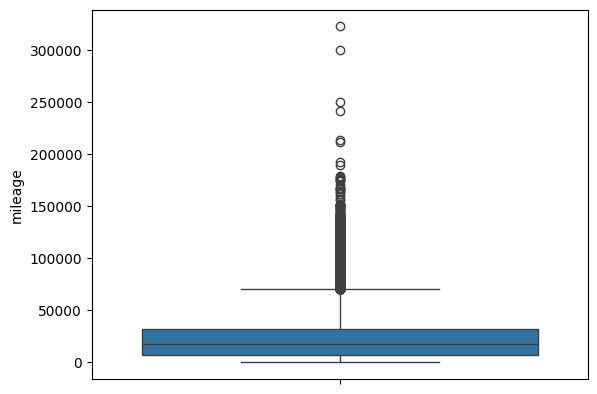

In [24]:
sns.boxplot(data=df_cars['mileage'])
plt.show()

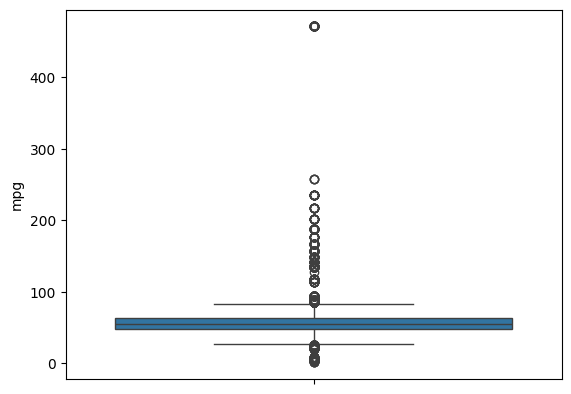

In [25]:
sns.boxplot(data=df_cars['mpg'])
plt.show()

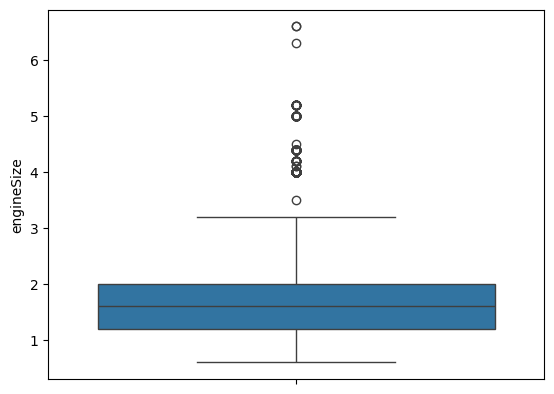

In [26]:
sns.boxplot(data=df_cars['engineSize'])
plt.show()

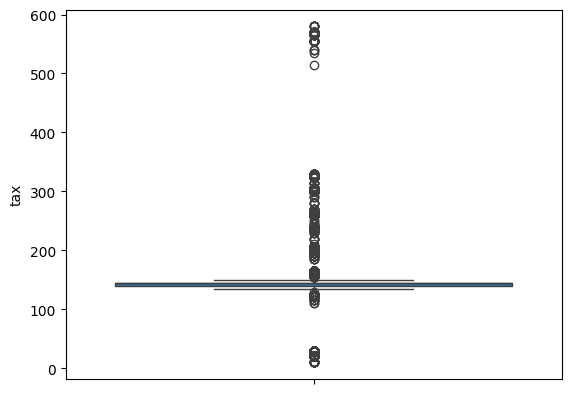

In [27]:
sns.boxplot(data=df_cars['tax'])
plt.show()

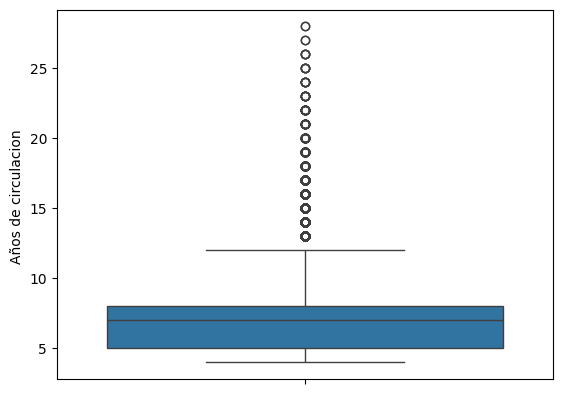

In [28]:
sns.boxplot(data=df_cars['Años de circulacion '])
plt.show()

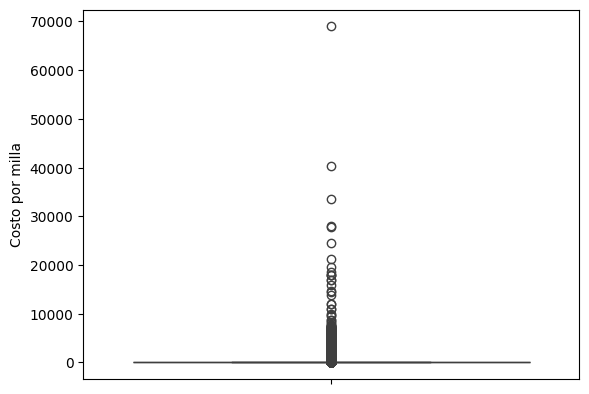

In [29]:
sns.boxplot(data=df_cars['Costo por milla'])
plt.show()

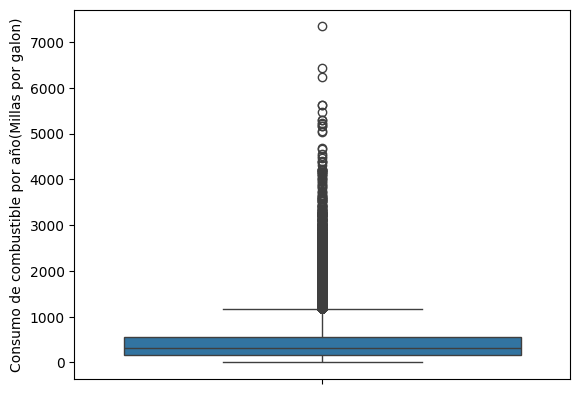

In [30]:
sns.boxplot(data=df_cars['Consumo de combustible por año(Millas por galon)'])
plt.show()

Algunos Calculos para las columnas

**Primera columna precio**

In [31]:
media_price = df_cars['price'].mean()
print(f'La media es: {media_price}')

#Valor minimo
min_price=df_cars['price'].min()
print(f'el minimo es : {min_price}')

#Valor maximo
max_price=df_cars['price'].max()
print(f'el maximo es: {max_price}')

#Desviacion Estandandar
desest=df_cars['price'].std()
print(f'la desviasion estadar es: {desest}')

La media es: 16580.158707807
el minimo es : 495
el maximo es: 145000
la desviasion estadar es: 9299.028753602528


**Columna tax**

In [32]:
media_tax = df_cars['tax'].mean()
print(f'La media es: {media_tax}')

#Valor minimo
min_tax=df_cars['tax'].min()
print(f'el minimo es : {min_tax}')

#Valor maximo
max_tax=df_cars['tax'].max()
print(f'el maximo es: {max_tax}')

#Desviacion Estandandar
desest=df_cars['tax'].std()
print(f'la desviasion estadar es :{desest}')

La media es: 128.48774763581142
el minimo es : 10
el maximo es: 580
la desviasion estadar es :54.25211327642951


**Columna Millas por galon**

In [33]:
media_MG = df_cars['Consumo de combustible por año(Millas por galon)'].mean()
print(f'La media es: {media_MG}')

#Valor minimo
min_MG=df_cars['Consumo de combustible por año(Millas por galon)'].min()
print(f'el minimo es : {min_MG}')

#Valor maximo
max_MG=df_cars['Consumo de combustible por año(Millas por galon)'].max()
print(f'el maximo es: {max_MG}')

#Desviacion Estandandar
desest=df_cars['Consumo de combustible por año(Millas por galon)'].std()
print(f'la desviasion estadar es :{desest}')

La media es: 422.43218057568856
el minimo es : 1.0
el maximo es: 7341.0
la desviasion estadar es :403.5987289757012


**Columna millage**

In [34]:
media_mileage = df_cars['mileage'].mean()
print(f'La media es: {media_mileage}')

#Valor minimo
min_mileage=df_cars['mileage'].min()
print(f'el minimo es : {min_mileage}')

#Valor maximo
max_mileage=df_cars['mileage'].max()
print(f'el maximo es: {max_mileage}')

#Desviacion Estandandar
desest=df_cars['mileage'].std()
print(f'la desviasion estadar es :{desest}')

La media es: 23176.5170566715
el minimo es : 1
el maximo es: 323000
la desviasion estadar es :21331.515561956647


**Columna años de circulacion**

In [35]:
media_AC = df_cars['Años de circulacion '].mean()
print(f'La media es: {media_AC}')

#Valor minimo
min_AC=df_cars['Años de circulacion '].min()
print(f'el minimo es : {min_AC}')

#Valor maximo
max_AC=df_cars['Años de circulacion '].max()
print(f'el maximo es: {max_AC}')

#Desviacion Estandandar
desest=df_cars['Años de circulacion '].std()
print(f'la desviasion estadar es :{desest}')

La media es: 6.9263339545799685
el minimo es : 4
el maximo es: 28
la desviasion estadar es :2.1012519260701783


Algunos filtros importantes para conocer aspectos del df_cars

In [36]:
#Promedio de precios por marca
precio_por_marca= df_cars.groupby('Make')['price'].mean().sort_values(ascending=False)
print(f'El precio promedio por marca es :{precio_por_marca}')

# cantidad de autos por marca

Cantidad_de_autos_por_marca= df_cars['Make'].value_counts()
print(f' la Cantidad_de_autos_por_marca :{Cantidad_de_autos_por_marca}')

# cantidad de autos =

total_autos= len(df_cars)
print(f"La cantidad total de autos es: {total_autos}")

#Precio Maximo y minimo por marca

precio_max_min_por_marca = df_cars.groupby('Make')['price'].agg(['max', 'min'])
print("Precio máximo y mínimo por marca:")
print(precio_max_min_por_marca)



El precio promedio por marca es :Make
audi       22896.685039
BMW        22733.408867
vw         16838.952365
skoda      14275.449338
Hyundai    12750.131070
toyota     12522.391066
Ford       12280.078435
Name: price, dtype: float64
 la Cantidad_de_autos_por_marca :Make
Ford       17964
vw         15157
BMW        10781
audi       10668
toyota      6738
skoda       6267
Hyundai     4860
Name: count, dtype: int64
La cantidad total de autos es: 72435
Precio máximo y mínimo por marca:
            max   min
Make                 
BMW      123456  1200
Ford      54995   495
Hyundai   92000  1200
audi     145000  1490
skoda     91874   995
toyota    59995   850
vw        69994   899


## Datos Categoricos

In [37]:
df_cars.describe(include='object')

,Primiry_key,model,transmission,fuelType,Make,Tax_Bracket
count,72435,72435,72435,72435,72435,72435
unique,69055,146,4,5,7,3
top,BMW_ X2_2019_Automatic_123_Petrol_2,Fiesta,Manual,Petrol,Ford,Medio
freq,23,6556,43021,40370,17964,50525


In [38]:
df_cars['Primiry_key'].value_counts()

,count
Primiry_key,
BMW_ X2_2019_Automatic_123_Petrol_2,23
vw_ Polo_2019_Manual_5000_Petrol_1,20
"BMW_ 2 Series_2019_Manual_123_Petrol_1,5",19
vw_ Up_2020_Manual_100_Petrol_1,16
BMW_ X2_2019_Automatic_123_Diesel_2,15
...,...
Ford_ Fiesta_2018_Manual_6203_Petrol_1,1
Ford_ Fiesta_2018_Manual_12135_Petrol_1,1
Ford_ Fiesta_2013_Manual_45187_Petrol_1,1


In [39]:
df_cars['model'].value_counts()

,count
model,
Fiesta,6556
Golf,4863
Focus,4588
Polo,3287
3 Series,2443
...,...
RS7,1
Escort,1
Accent,1


In [40]:
df_cars['transmission'].value_counts()

,count
transmission,
Manual,43021
Semi-Auto,15364
Automatic,14046
Other,4


In [41]:
df_cars['fuelType'].value_counts()

,count
fuelType,
Petrol,40370
Diesel,28918
Hybrid,2903
Other,239
Electric,5


In [42]:
df_cars['Make'].value_counts()

,count
Make,
Ford,17964
vw,15157
BMW,10781
audi,10668
toyota,6738
skoda,6267
Hyundai,4860


In [43]:
df_cars['Tax_Bracket'].value_counts()

,count
Tax_Bracket,
Medio,50525
Bajo,18366
Alto,3544


Graficos de las variables encontradas, podemos graficar tanto medidas como dimensiones para conocer las relaciones entre las varaibles del df_cars


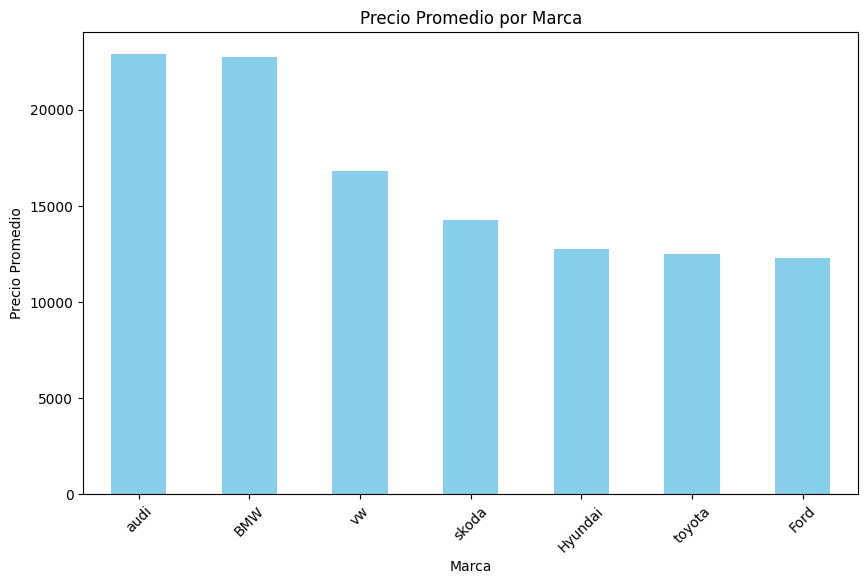

In [44]:
# Visualización de precios por marca

plt.figure(figsize=(10, 6))
precio_por_marca.plot(kind='bar', color='skyblue')
plt.title('Precio Promedio por Marca')
plt.xlabel('Marca')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.show()


<ipython-input-45-1e7a481e063b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transmission', y='price', data=df_cars, palette='Set2')


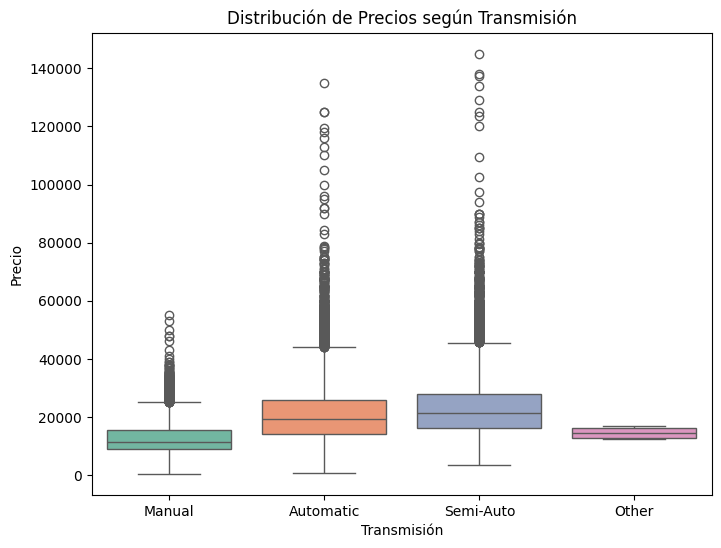

In [45]:
# Distribución de precios según la transmisión (automática o manual)

plt.figure(figsize=(8, 6))
sns.boxplot(x='transmission', y='price', data=df_cars, palette='Set2')
plt.title('Distribución de Precios según Transmisión')
plt.xlabel('Transmisión')
plt.ylabel('Precio')
plt.show()

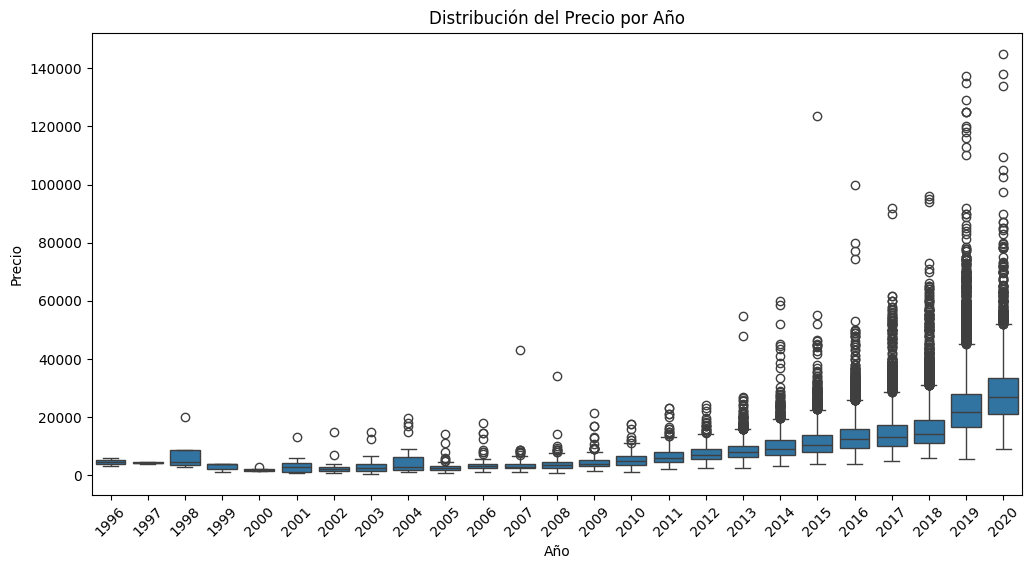

In [46]:
# Distribución del Precio por Año:

plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='price', data=df_cars)
plt.title('Distribución del Precio por Año')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

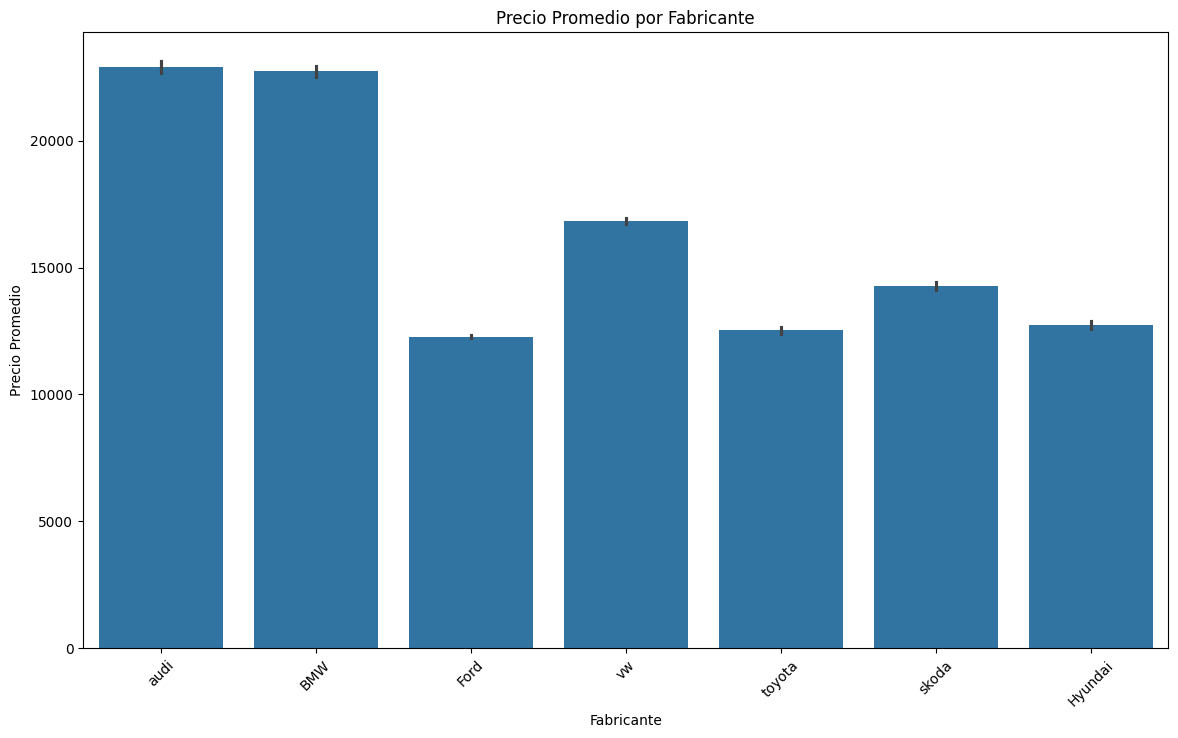

In [47]:
# Precio promedio por año POR fabricante

plt.figure(figsize=(14, 8))
sns.barplot(x='Make', y='price', data=df_cars, estimator=lambda x: sum(x) / len(x))
plt.title('Precio Promedio por Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.show()

<ipython-input-48-9e11515f373c>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='price', hue='Make', data=df_cars, ci=None, estimator='mean', marker='o')


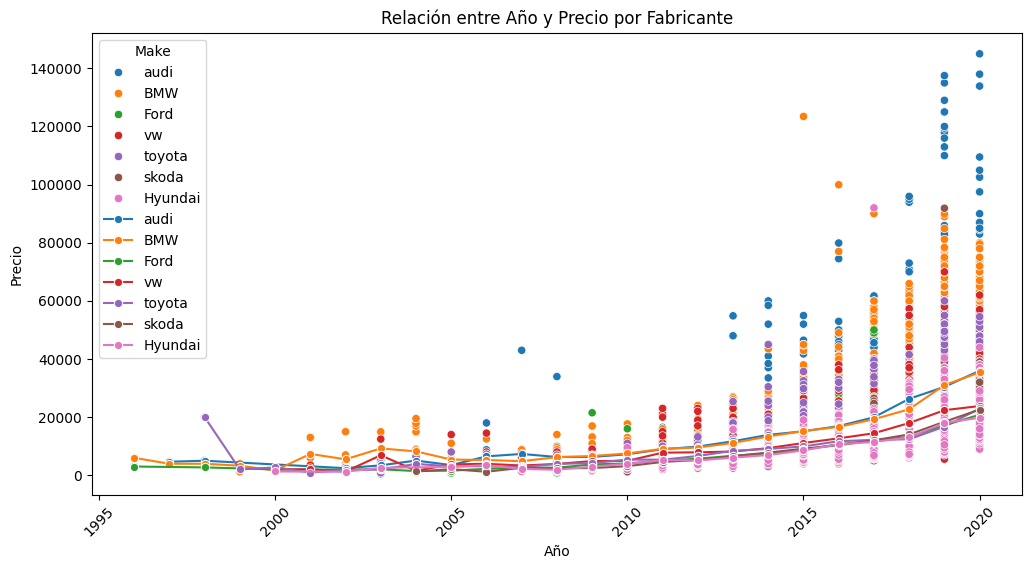

In [48]:
#Relación entre Año y Precio

plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='price', hue='Make', data=df_cars)
sns.lineplot(x='year', y='price', hue='Make', data=df_cars, ci=None, estimator='mean', marker='o')
plt.title('Relación entre Año y Precio por Fabricante')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()


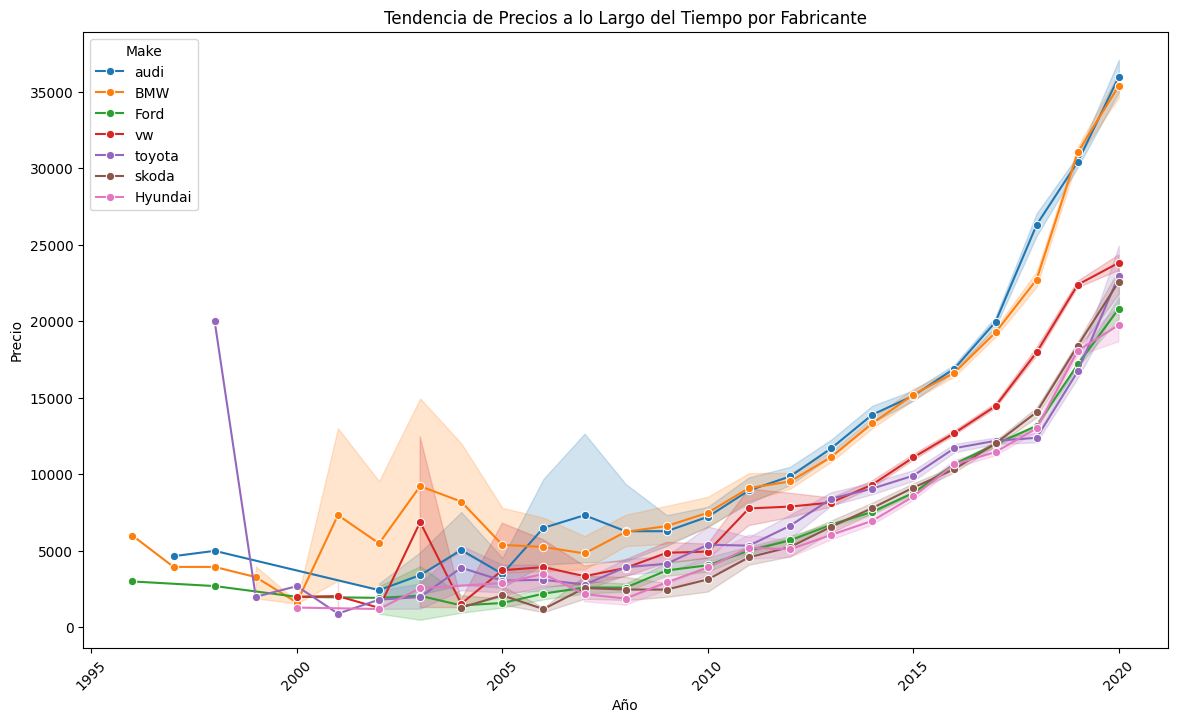

In [49]:
#  Tendencias de Precio a lo Largo del Tiempo por Fabricante:

plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='price', hue='Make', data=df_cars, marker='o')
plt.title('Tendencia de Precios a lo Largo del Tiempo por Fabricante')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()



## Preprocesamiento

In [50]:
# label encoder para la categoricas
column= ['Primiry_key','model', 'transmission', 'fuelType', 'Make', 'Tax_Bracket']
df_cars[column] = df_cars[column].apply(LabelEncoder().fit_transform)

In [51]:
# elimino el id Primiry_Key
df_cars.drop('Primiry_key',axis=1,inplace=True)


In [52]:
df_cars.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make,Años de circulacion,Costo por milla,Consumo de combustible por año(Millas por galon),Tax_Bracket
0,8,2017,12500,1,15735,4,150,55,1.4,3,7,0.794407,286.0,2
1,13,2016,16500,0,36203,0,20,64,2.0,3,8,0.455763,566.0,1
2,8,2016,11000,1,29946,4,30,55,1.4,3,8,0.367328,544.0,1
3,11,2017,16800,0,25952,0,145,67,2.0,3,7,0.647349,387.0,2
4,10,2019,17300,1,1998,4,145,50,1.0,3,5,8.658659,40.0,2


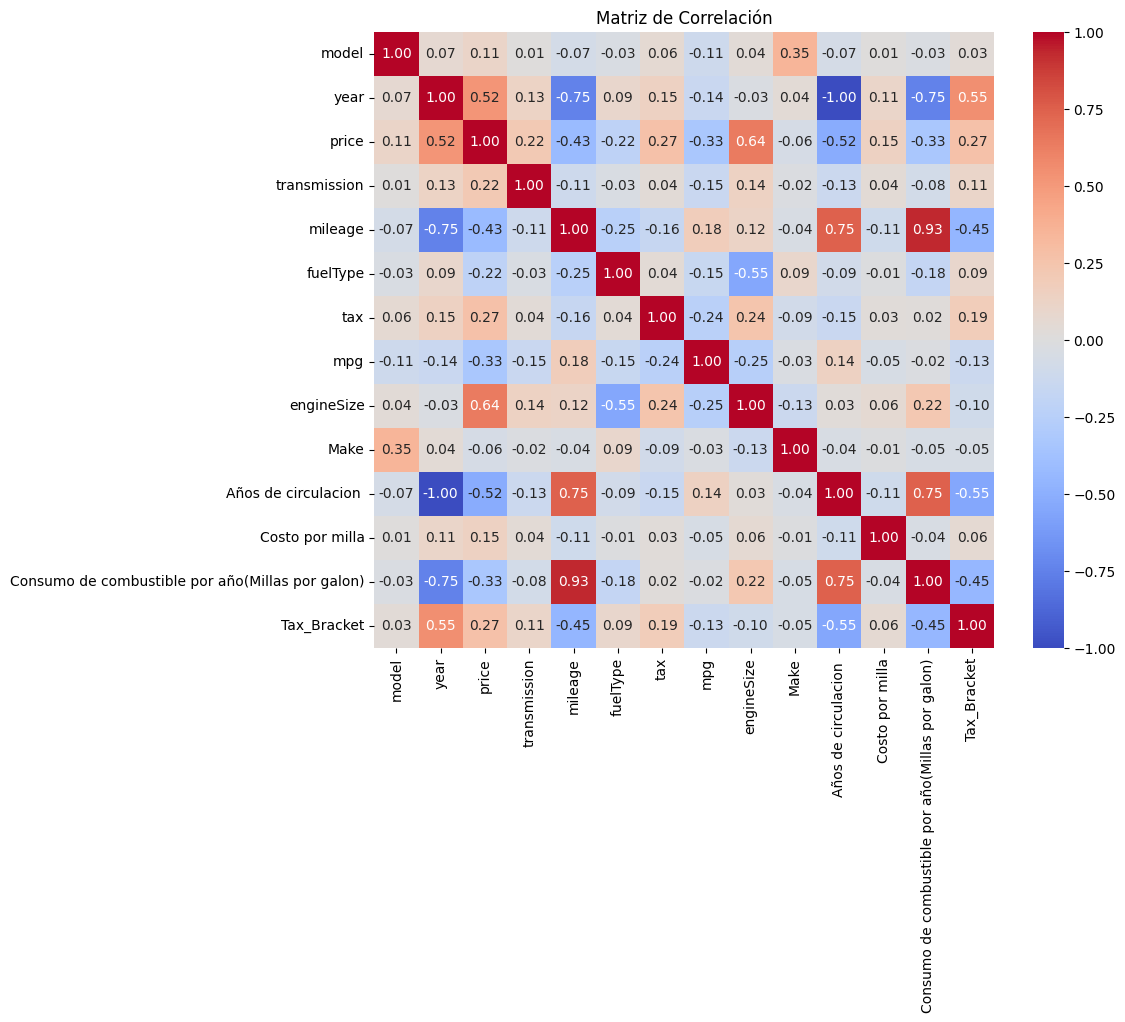

In [53]:
# Creación de la matriz de correlación
correlation_matrix = df_cars.corr()
# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


## Modelado

In [54]:
# Cargar los datos
X = df_cars.drop(['price'],axis=1)
y = df_cars['price']

In [55]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

print('x_train size',X_train.shape)
print('y_train size',y_train.shape)
print('x_test size',X_test.shape)
print('y_test size',y_test.shape)

x_train size (50704, 13)
y_train size (50704,)
x_test size (21731, 13)
y_test size (21731,)


## Regresión Lineal

In [56]:
# instanciamos el modelo
model=LinearRegression()

In [57]:
# entranamos
model.fit(X_train, y_train)

LinearRegression()

In [58]:
# prediccion
y_pred = model.predict(X_test)

In [59]:
# metrica R2
r2_rl = r2_score(y_test, y_pred)
r2_rl

0.7389095902630195

## KNN

In [60]:
# instanciamos el modelo
model = KNN(n_neighbors=5,weights="uniform",metric="manhattan")

In [61]:
# entranamos
model.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan')

In [62]:
# prediccion
y_pred = model.predict(X_test)

In [63]:
# metrica R2
r2_knn = r2_score(y_test, y_pred)
r2_knn

0.6586674672892611

## XGBoost

In [64]:
# instanciamos el modelo
model = XGBRegressor(n_estimators= 2000 , max_depth= 7 , learning_rate = 0.01)

In [65]:
# entranamos
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
# prediccion
y_pred = model.predict(X_test)

In [67]:
# metrica R2
r2_xgb = r2_score(y_test, y_pred)
r2_xgb

0.9876788064715714

## Resultados del Test

In [68]:
print("Algoritmo Regresión Lineal " + str(round(r2_rl, 4)))
print("Algoritmo KNN " + str(round(r2_knn, 4)))
print("Algoritmo XGB " + str(round(r2_xgb, 4)))

Algoritmo Regresión Lineal 0.7389
Algoritmo KNN 0.6587
Algoritmo XGB 0.9877


El mejor modelo fue el XGB

Graficos de analisis

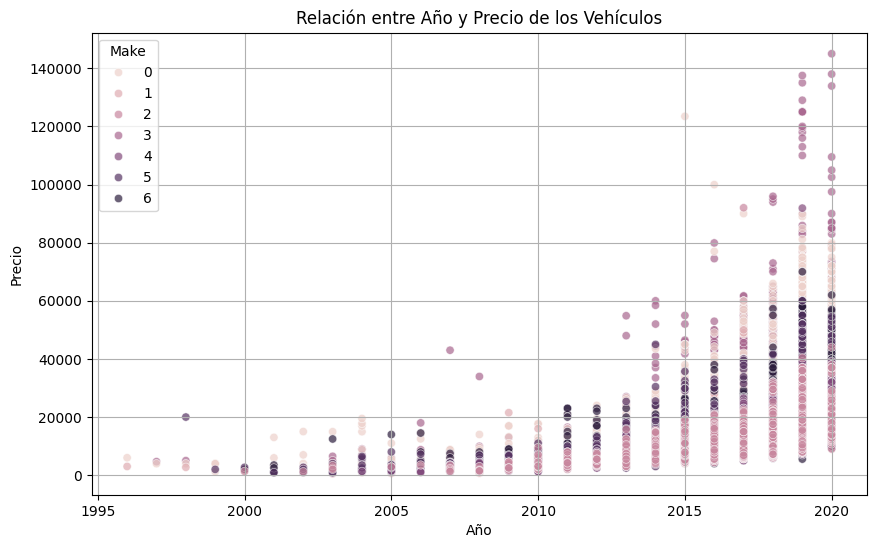

<ipython-input-69-21e8b126ea36>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='price', data=df_cars, ci=None)


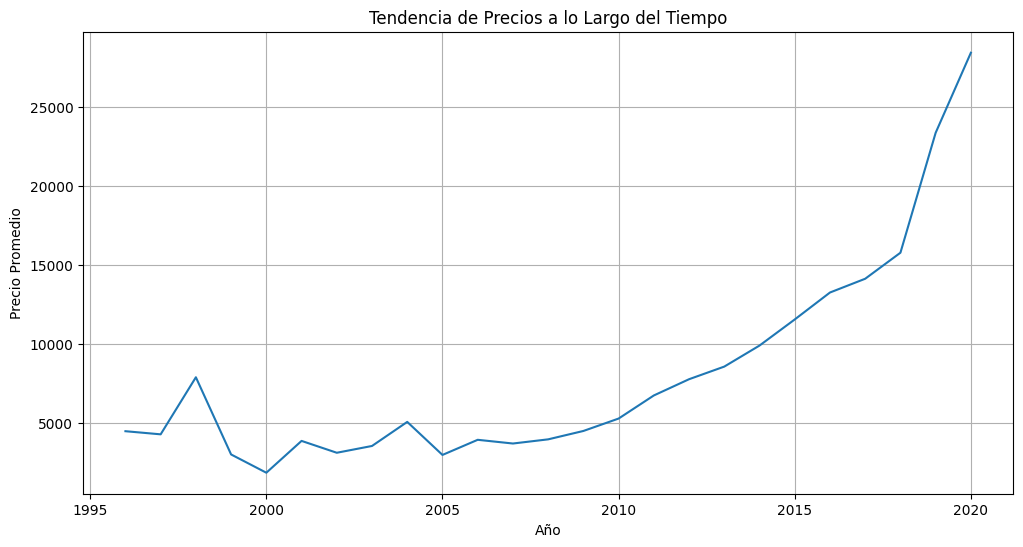

In [69]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=df_cars, hue='Make', alpha=0.7)
plt.title('Relación entre Año y Precio de los Vehículos')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

# Gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='price', data=df_cars, ci=None)
plt.title('Tendencia de Precios a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.grid(True)
plt.show()


**Resultado**

Relación Directa:  los gráficos muestran que los autos más nuevos tienden a tener precios más altos, esto confirmaría la hipótesis de que el año de fabricación es un factor importante en la determinación del precio.

Variabilidad por Marca: Al segmentar por marca, se sabe  que algunas marcas retienen mejor su valor con el tiempo que otras.

Respecto a los automaticos y manuales:

<ipython-input-70-c77694664ea8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transmission', y='price', data=df_cars, palette='Set2')


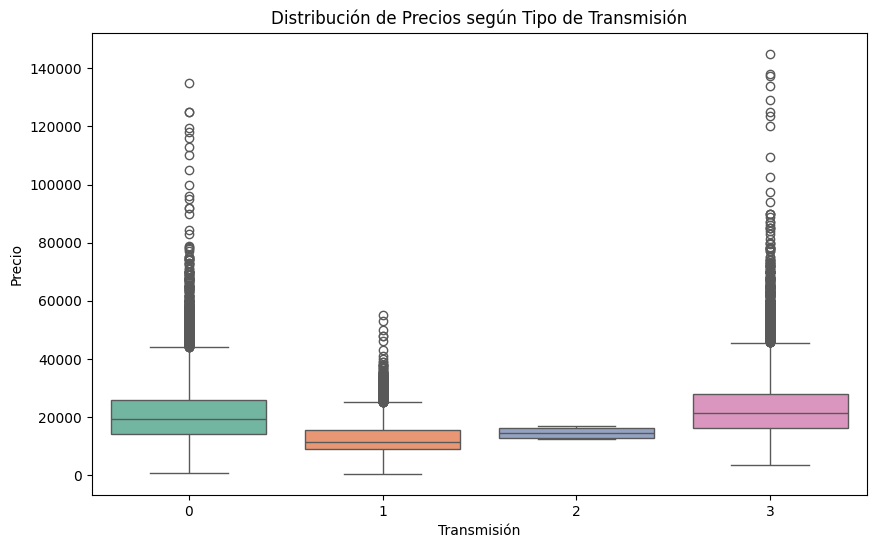

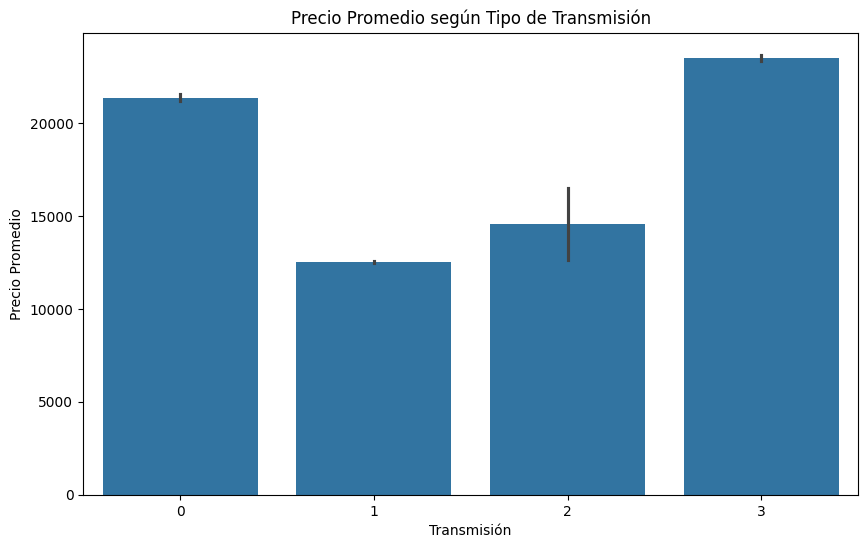

In [70]:
# Gráfico de caja (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df_cars, palette='Set2')
plt.title('Distribución de Precios según Tipo de Transmisión')
plt.xlabel('Transmisión')
plt.ylabel('Precio')
plt.show()

# Gráfico de barras (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(x='transmission', y='price', data=df_cars, estimator=np.mean)
plt.title('Precio Promedio según Tipo de Transmisión')
plt.xlabel('Transmisión')
plt.ylabel('Precio Promedio')
plt.show()


Diferencias de Precio: La transmisión automática muestra precios significativamente más altos, puede concluir que los autos automáticos son percibidos como más valiosos o que su fabricación es más costosa.

Distribución de Precios: El boxplot permite ver QUE  hay mayor variabilidad en los precios de los autos automáticos en comparación con los manuales.

Combustible segun el tamaño del motor y precio

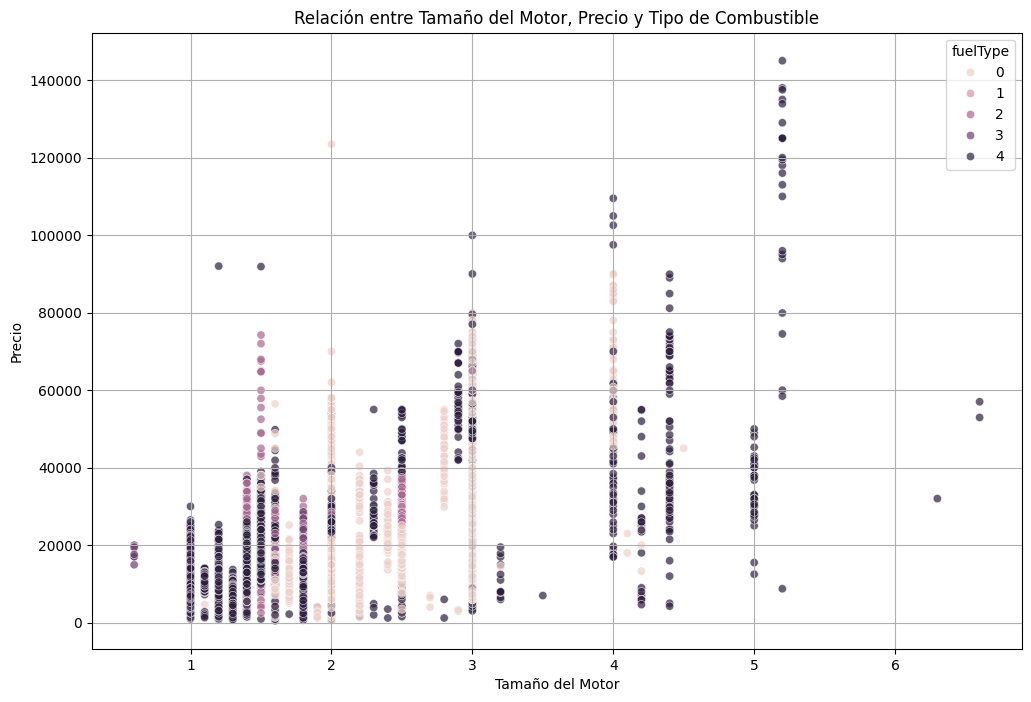

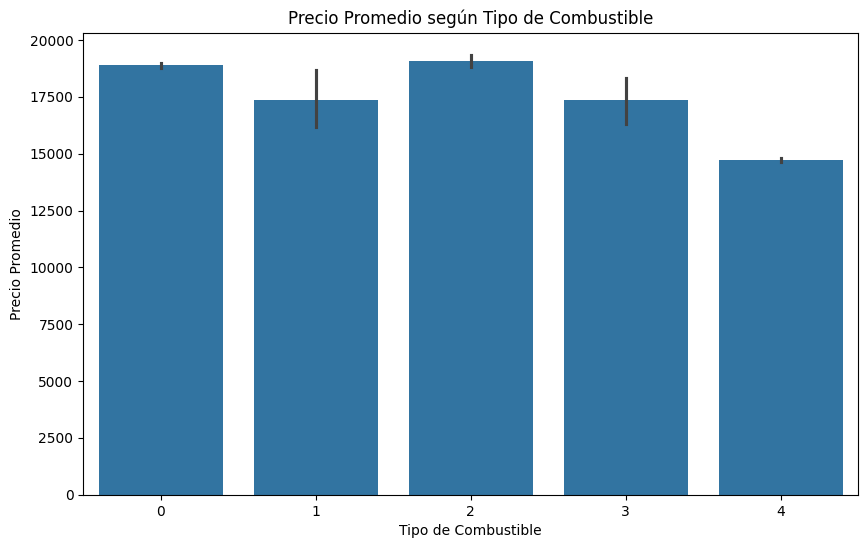

In [71]:
# Scatter plot con tres variables: tamaño del motor, precio y tipo de combustible
plt.figure(figsize=(12, 8))
sns.scatterplot(x='engineSize', y='price', hue='fuelType', data=df_cars, alpha=0.7)
plt.title('Relación entre Tamaño del Motor, Precio y Tipo de Combustible')
plt.xlabel('Tamaño del Motor')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

# Bar plot para el precio promedio por tipo de combustible
plt.figure(figsize=(10, 6))
sns.barplot(x='fuelType', y='price', data=df_cars, estimator=np.mean)
plt.title('Precio Promedio según Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio Promedio')
plt.show()


Influencia del Tamaño del Motor: los gráficos muestran que los autos con motores más grandes tienden a ser más caros, esto confirmaría que el tamaño del motor es un factor importante en el precio del vehículo.

Impacto del Tipo de Combustible: los autos que usan combustible más caro (como diésel) también tienen precios más altos, lo que podría indicar una relación entre el tipo de combustible y el valor percibido del vehículo.